In [19]:
import numpy as np
import tensorflow as tf
from qa_model import AttentionQA
from data import QALoader, tokenize
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
vocab_path = os.path.join('./data', 'vocab.json')
test = QALoader(os.path.join('./data', 'test.txt'), vocab_path, 100, 45, 5)

Pre-processing data...
Pre-processed 1000 lines of data.


In [21]:
tf.reset_default_graph()
m = AttentionQA()

save_dir = './models/'
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(tf.global_variables())
ckpt = tf.train.get_checkpoint_state(save_dir)
saver.restore(sess, ckpt.model_checkpoint_path)

AttributeError: 'NoneType' object has no attribute 'model_checkpoint_path'

In [7]:
x_batch, x_lengths, q_batch, q_lengths, label = test.next_batch()

In [13]:
train_dict = {m.encoder_inputs: x_batch,
              m.input_lengths: x_lengths,
              m.question_inputs: q_batch,
              m.question_lengths: q_lengths,
              m.pointer_labels: label}
pointers,prob,hprob = sess.run([m.pointers, m.qa_alignment, m.hqa_alignment], feed_dict=train_dict)
pointers = pointers[0]

In [9]:
classify = []
mis_classify = []
for i in range(100):
    ans = test.labels[i]
    if ans[0] == pointers[i]:
        classify.append(i)
    else:
        mis_classify.append(i)

In [10]:
for i in mis_classify:
    text = test.text[i]
    question = test.q_text[i]
    ans = test.labels[i]
    print(text)
    print('Question: {}'.format(question))
    print('Answer: {}'.format(tokenize(text)[ans[0]]))
    print('Pred: {} \n'.format(tokenize(text)[pointers[i]]))

she went home slowly ten minutes ago. she went to the hospital slowly five minutes ago. she went to germany. he went home suddenly.
Question: where is she ?
Answer: germany
Pred: he 

she went to canada. he went nowhere reluctantly.
Question: where is she ?
Answer: canada
Pred: he 

he went to germany five minutes ago. she slowly went home. he went to school suddenly ten minutes ago.
Question: where is she ?
Answer: home
Pred: went 

he went home earlier. she quickly went home. he went to the classroom suddenly five minutes ago.
Question: where is she ?
Answer: home
Pred: went 

he slowly went nowhere. she quickly went to germany. he suddenly went to the classroom five minutes ago.
Question: where is she ?
Answer: germany
Pred: he 



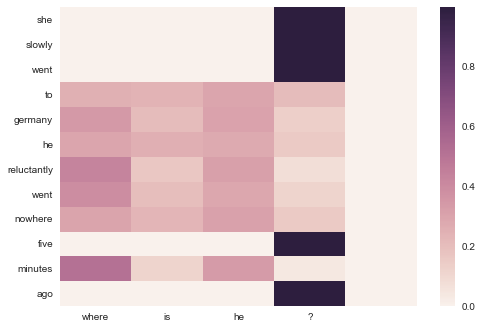

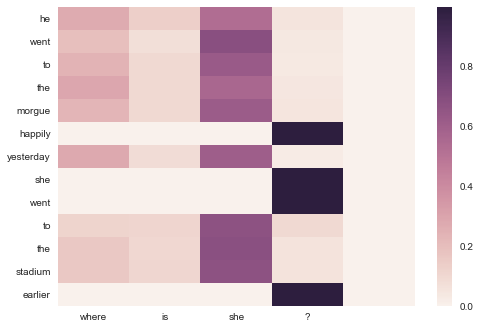

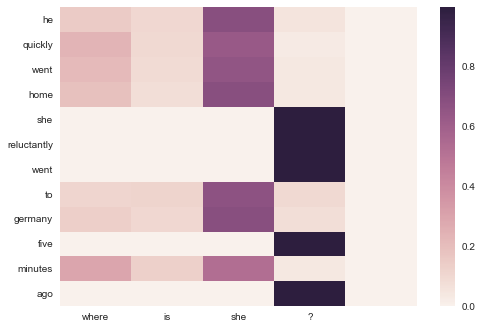

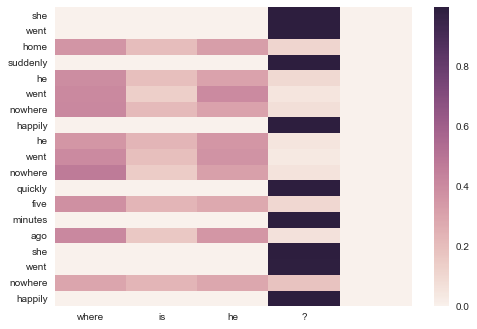

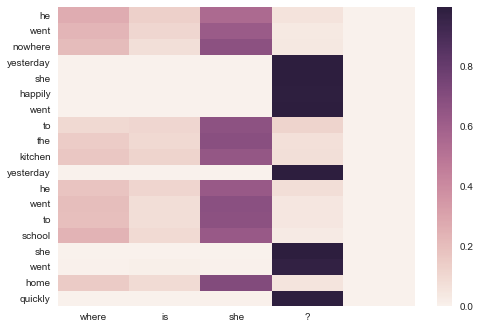

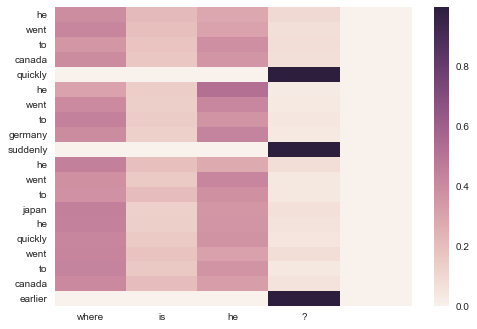

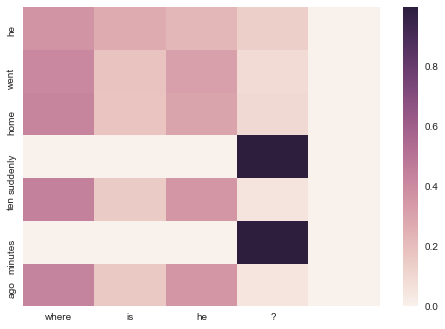

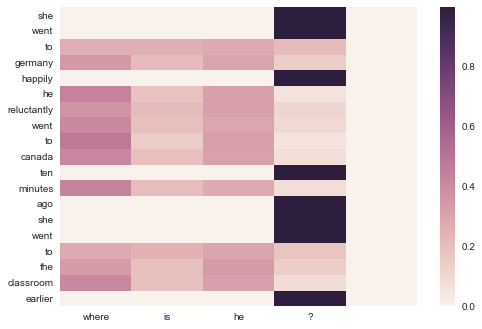

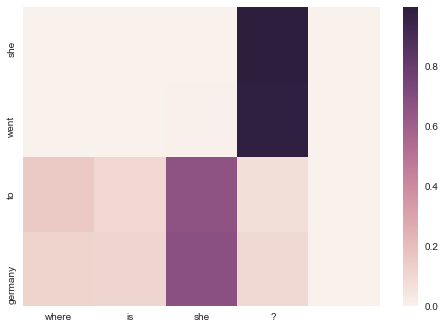

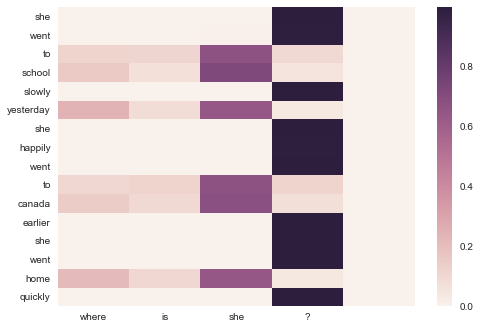

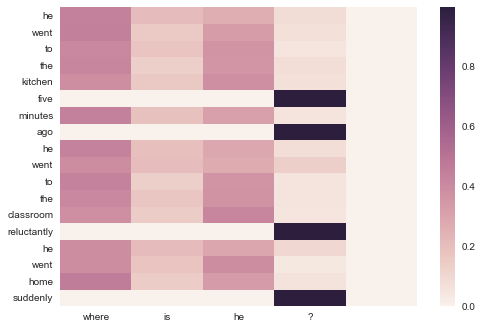

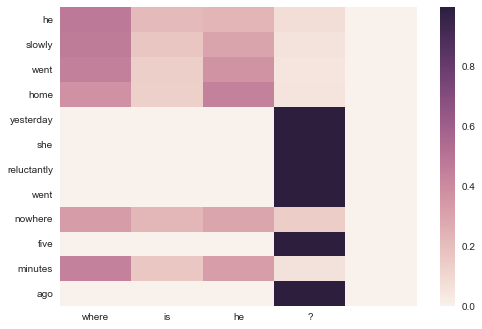

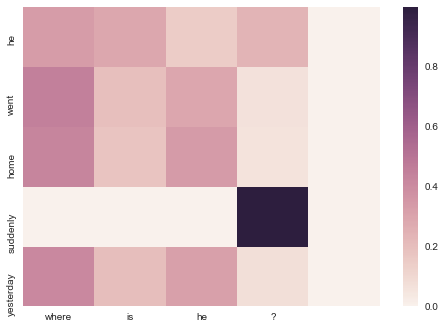

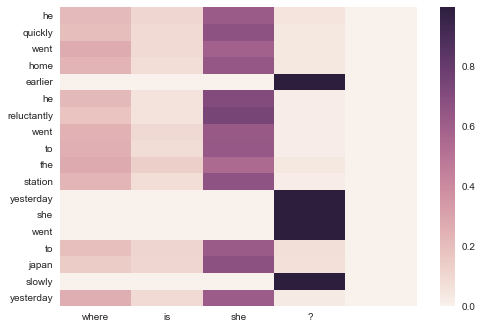

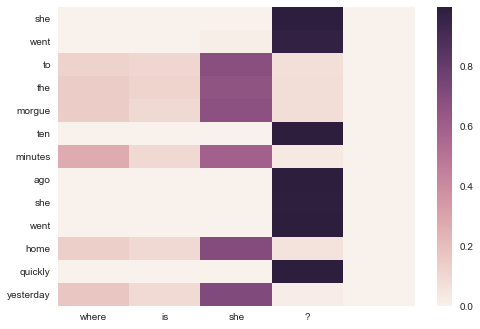

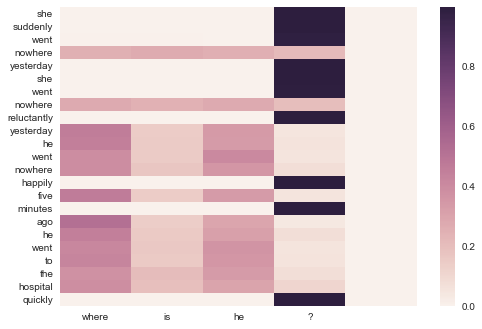

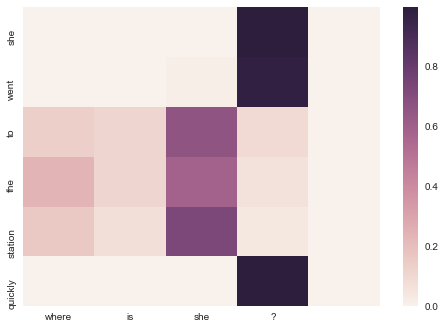

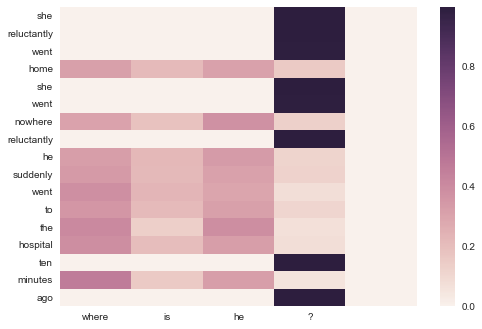

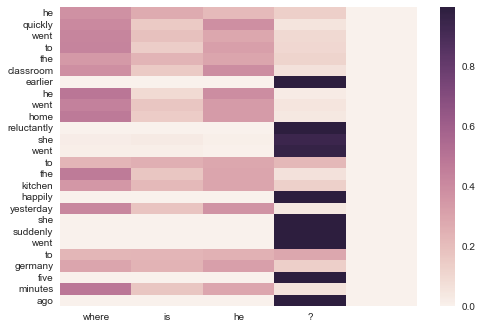

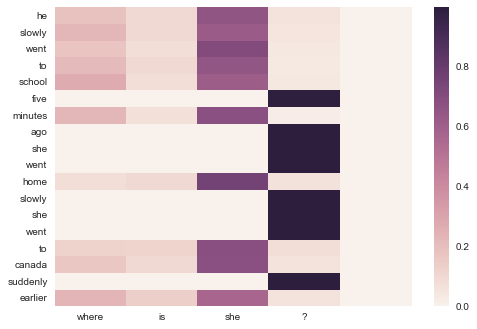

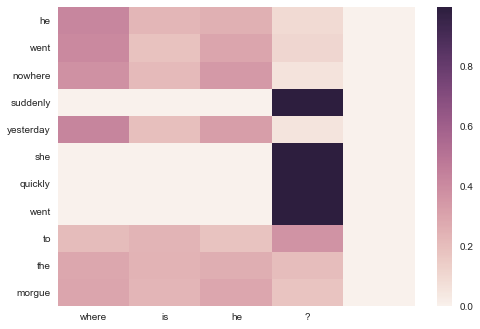

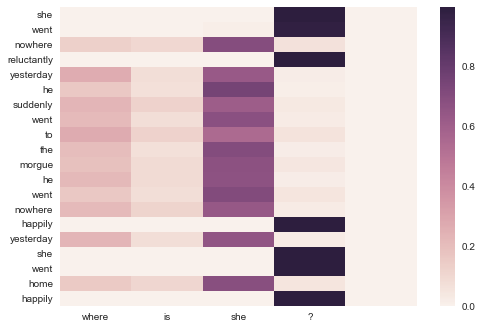

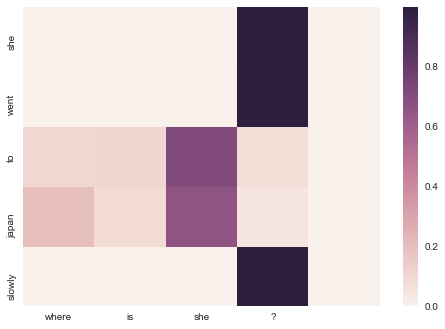

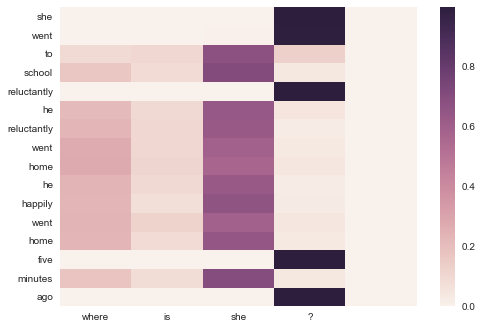

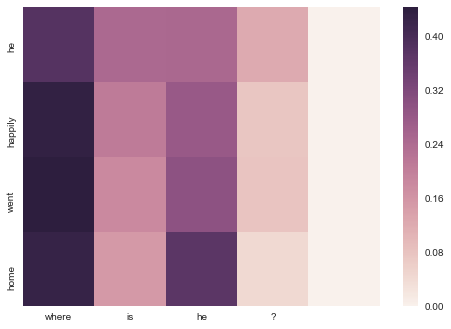

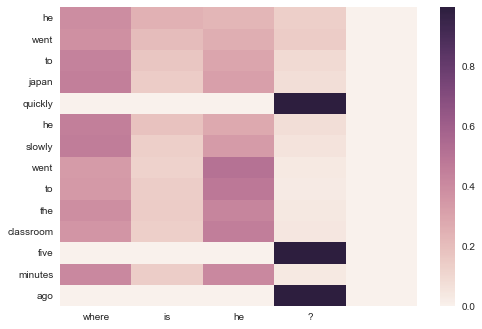

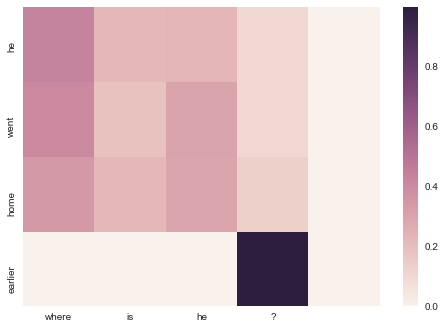

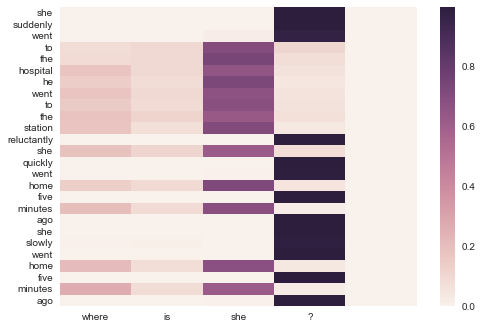

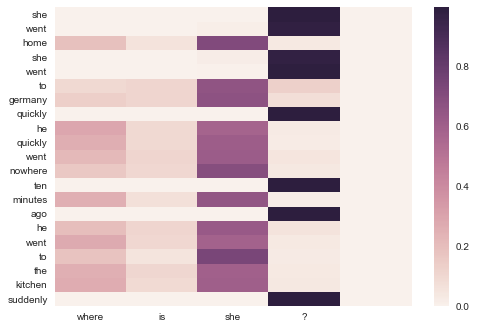

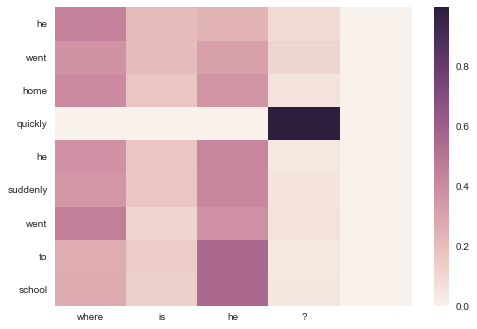

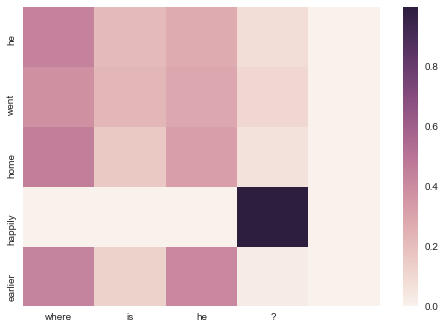

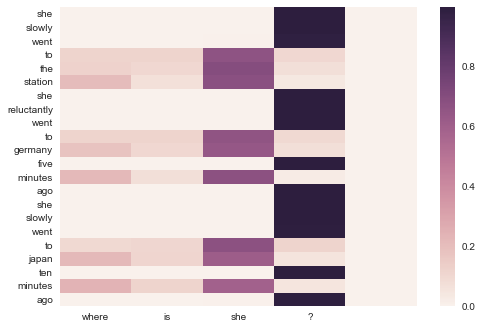

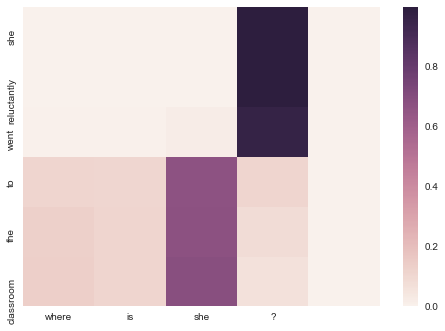

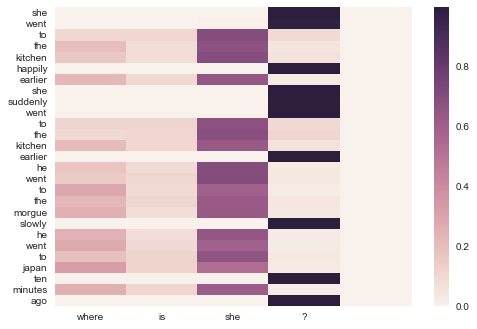

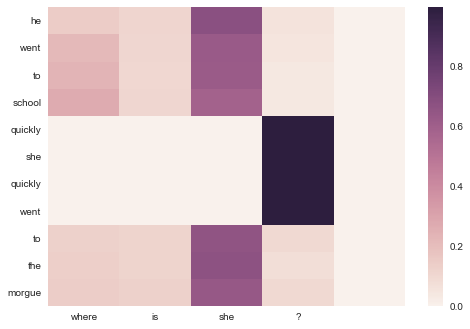

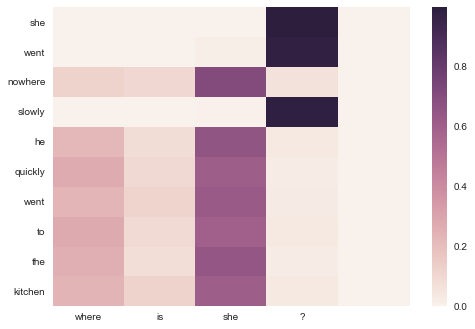

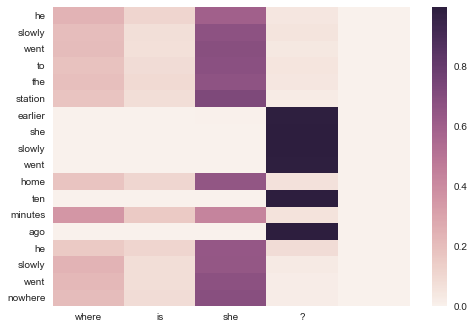

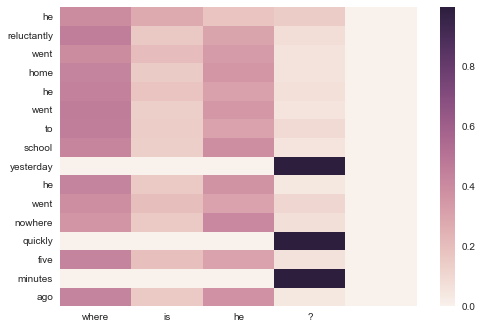

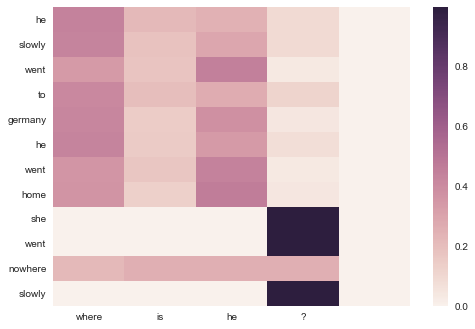

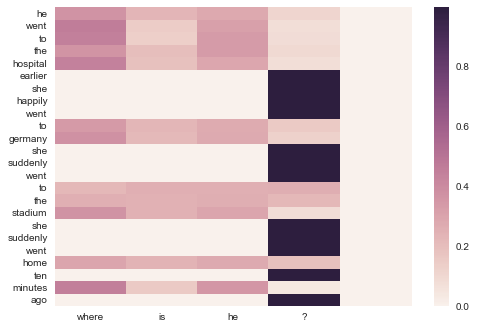

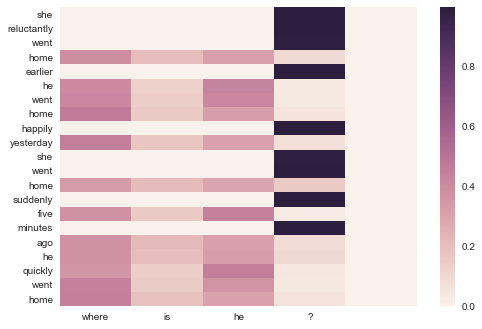

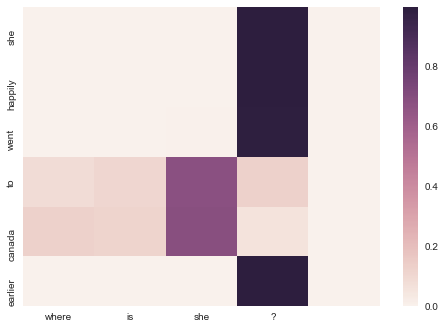

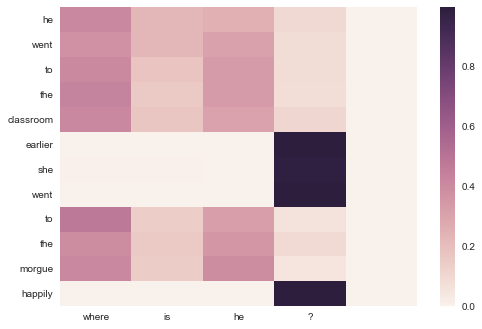

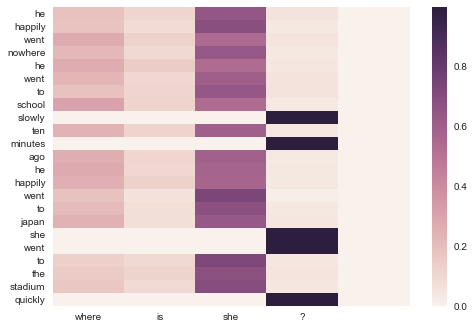

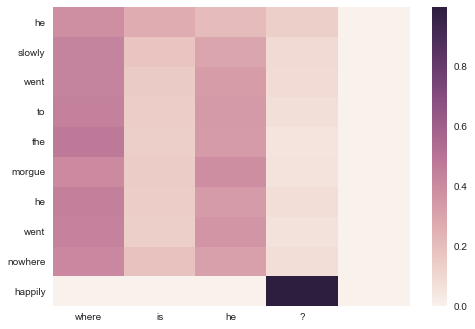

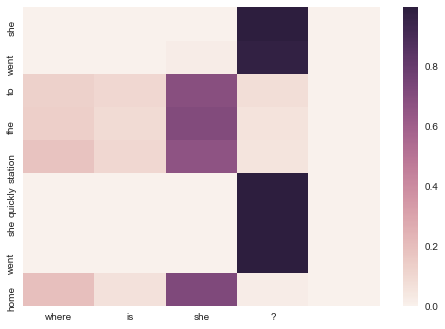

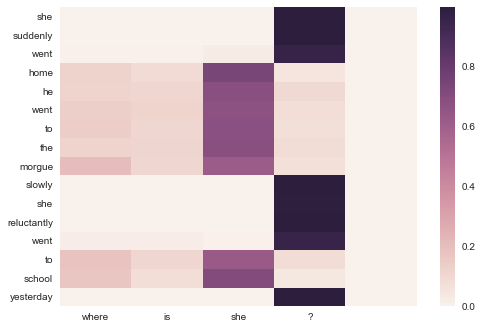

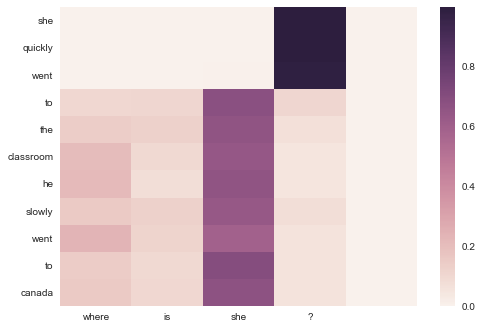

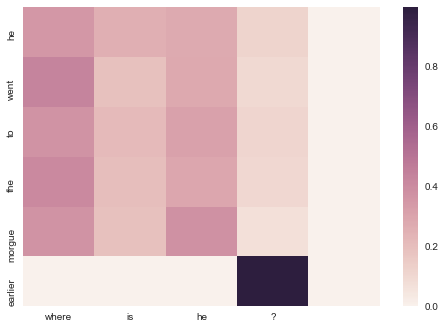

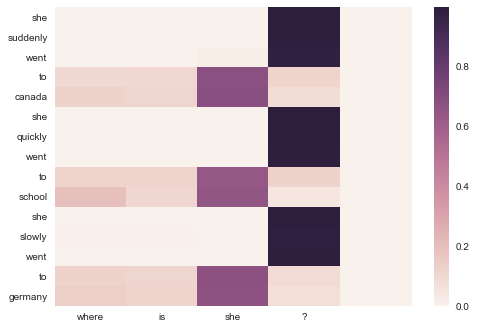

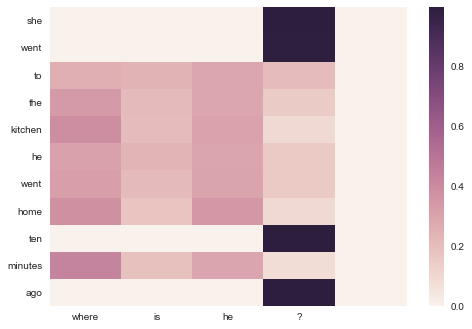

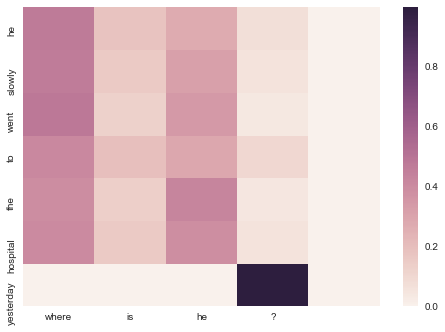

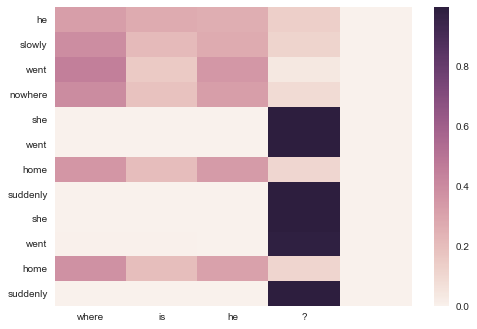

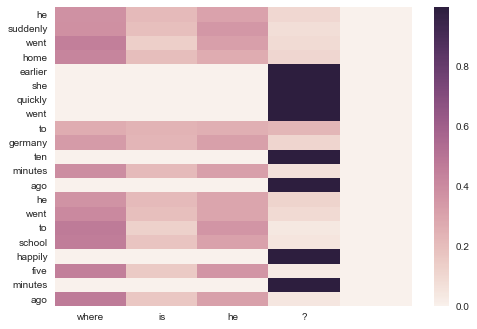

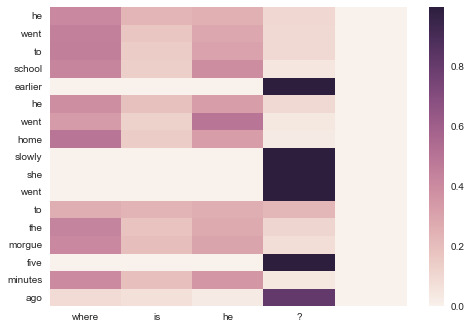

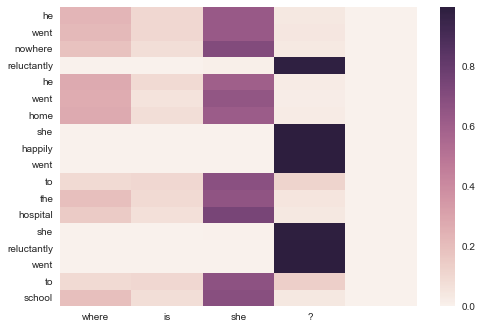

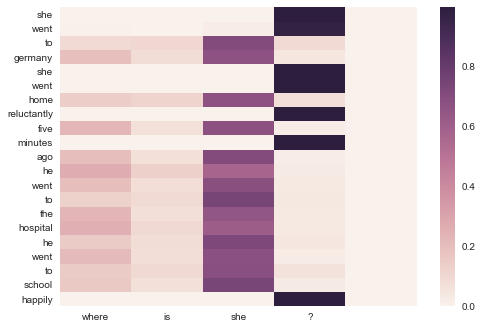

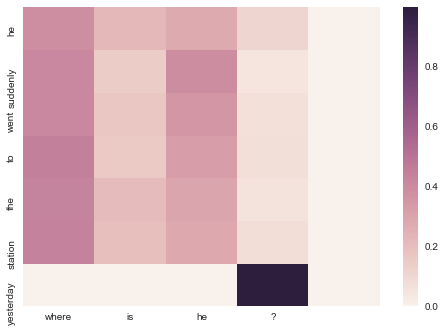

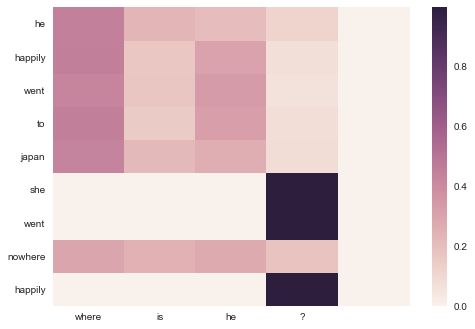

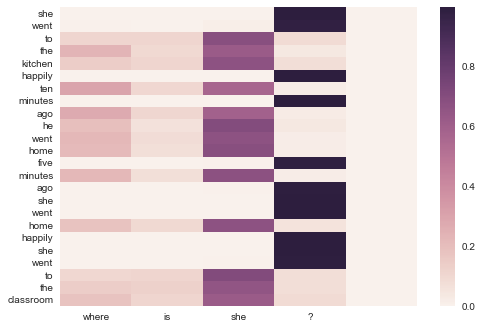

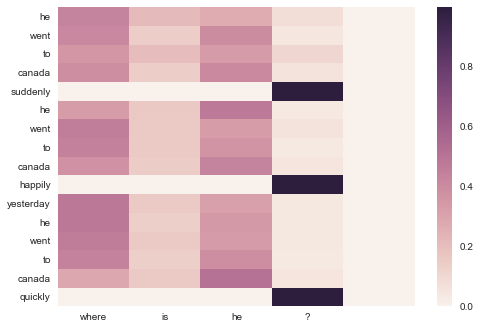

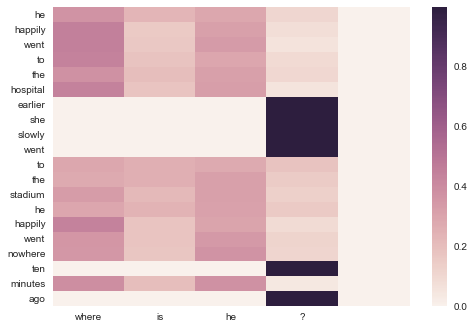

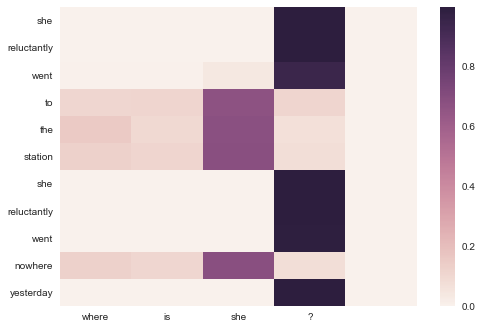

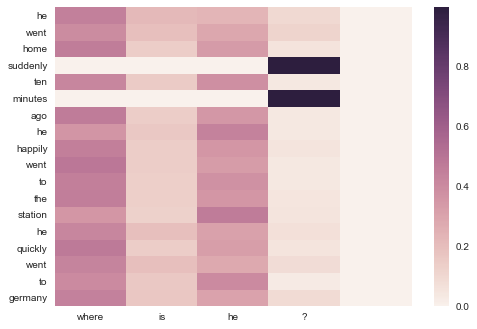

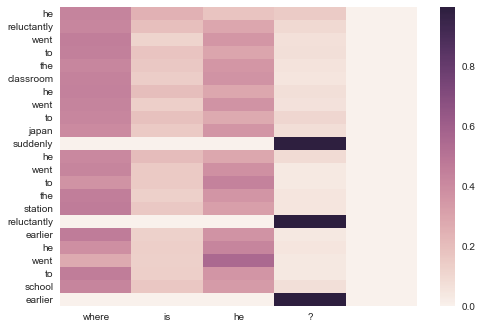

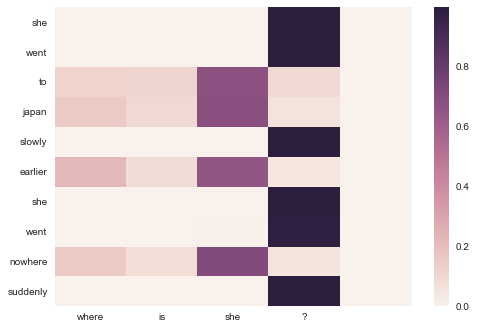

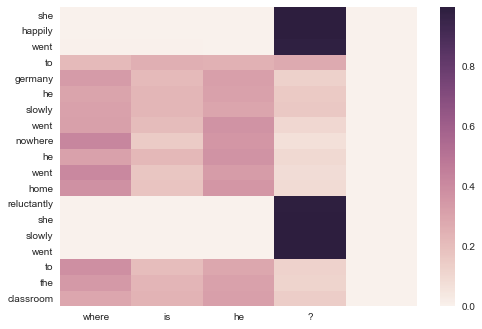

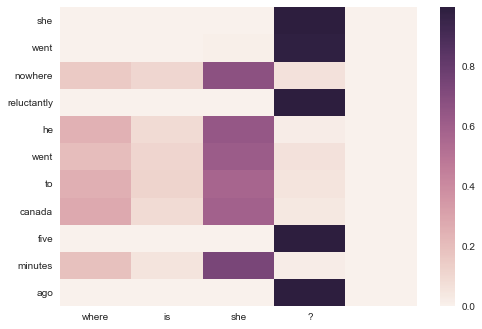

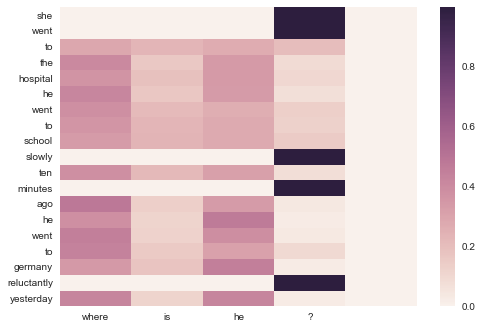

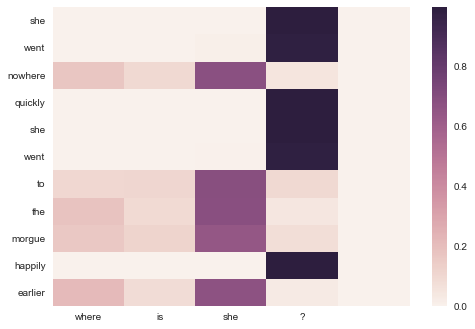

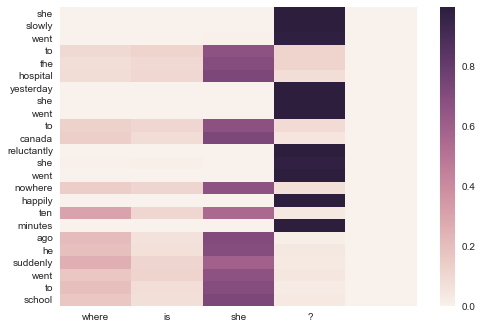

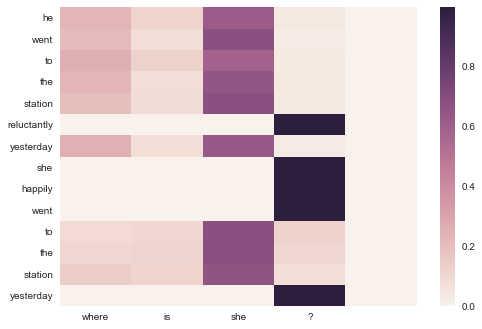

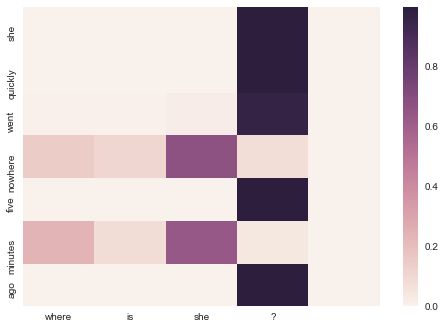

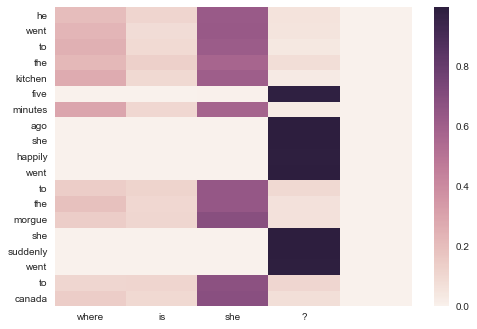

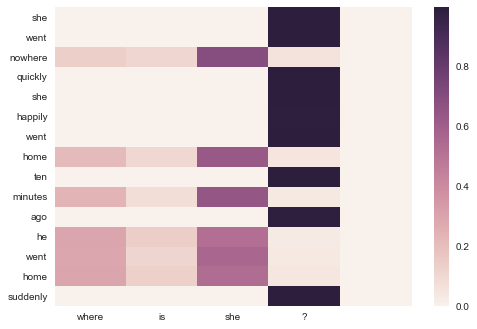

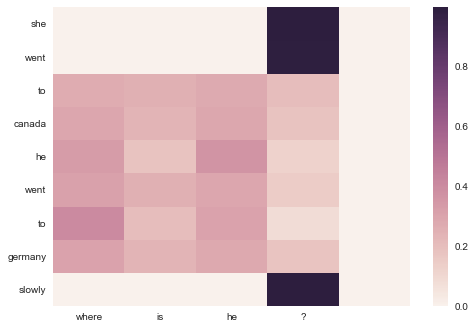

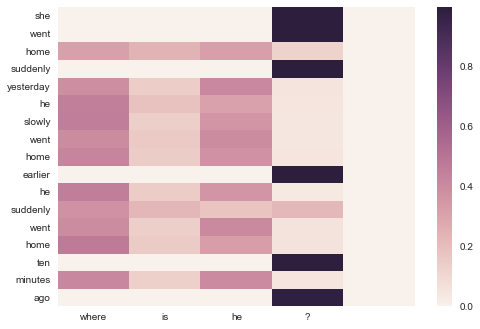

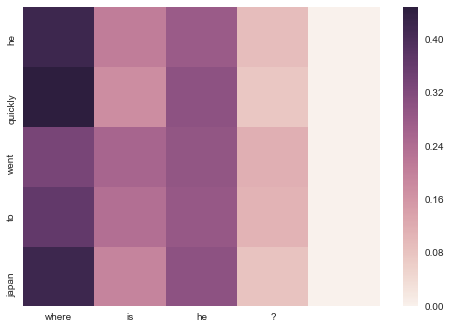

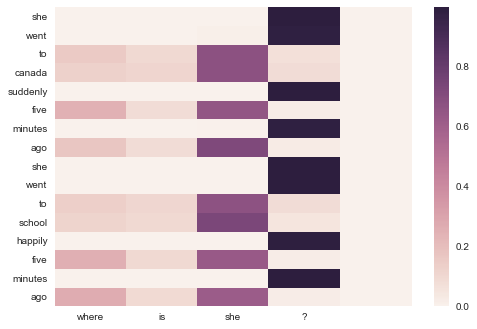

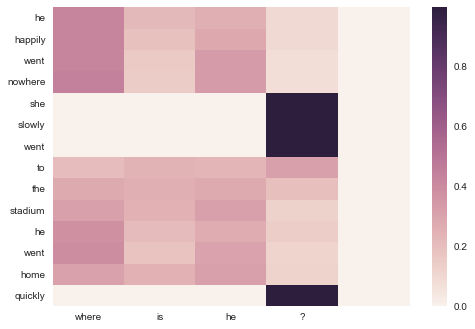

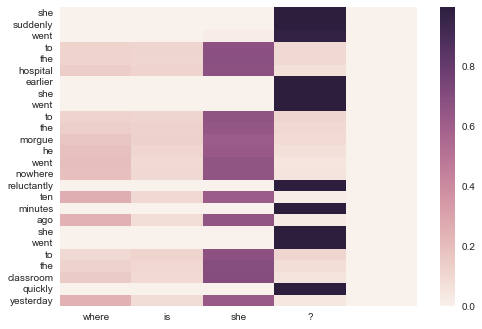

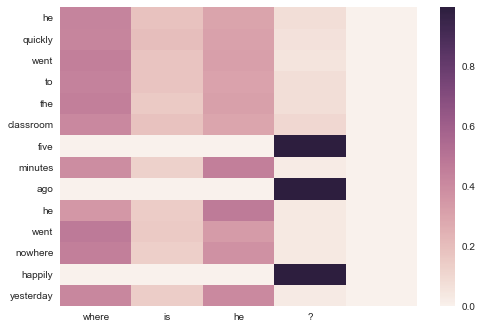

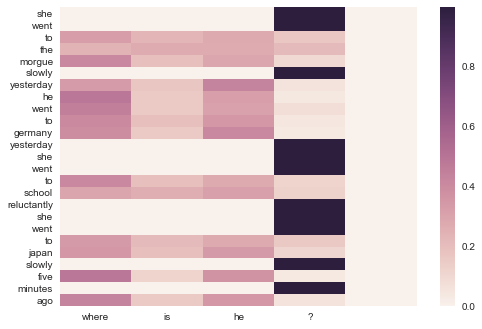

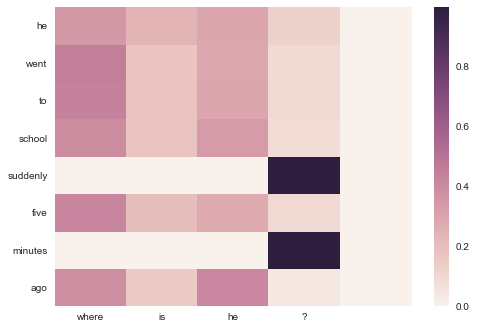

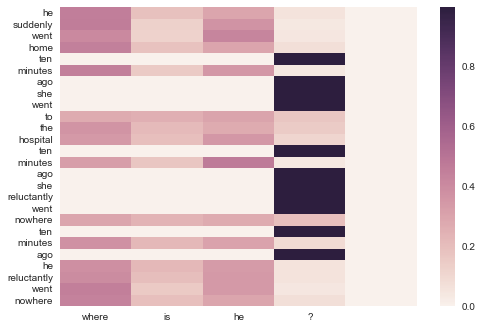

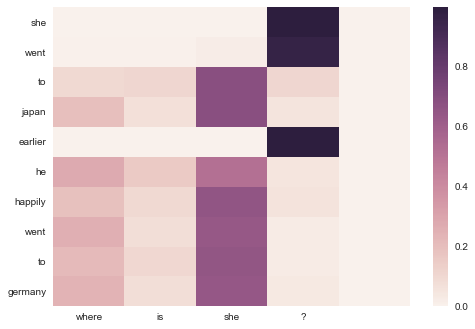

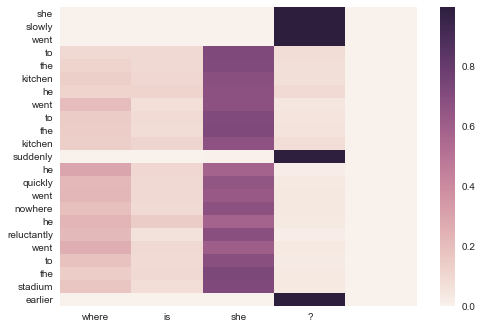

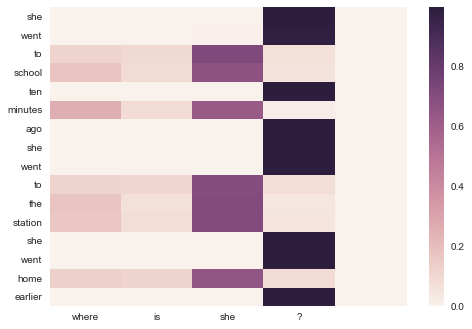

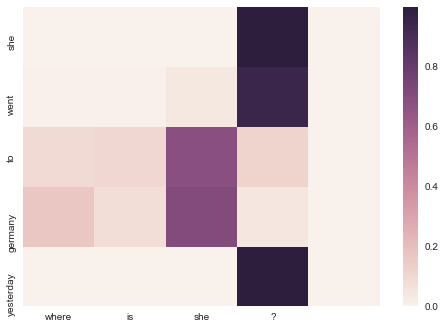

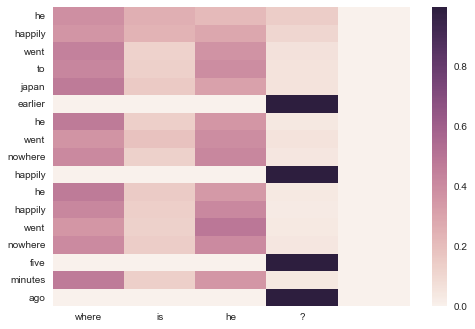

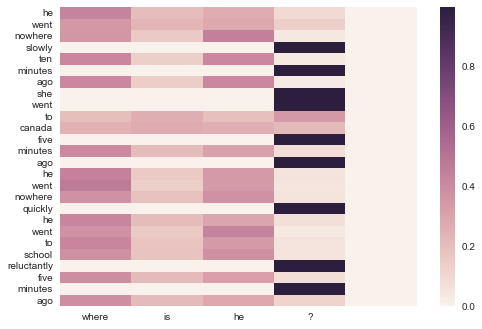

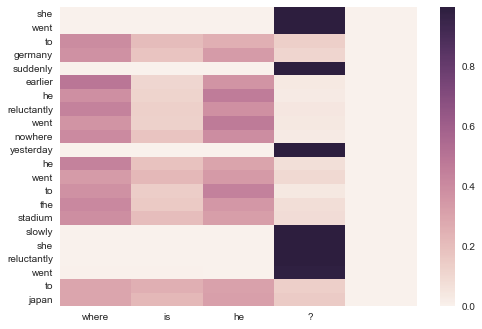

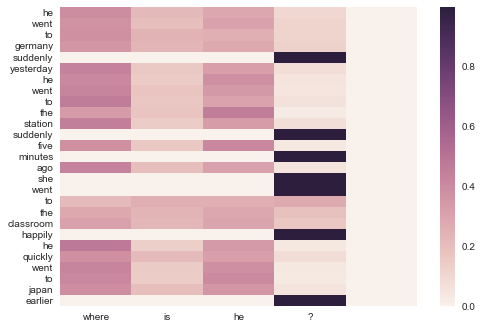

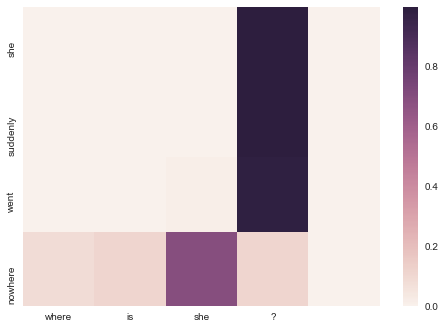

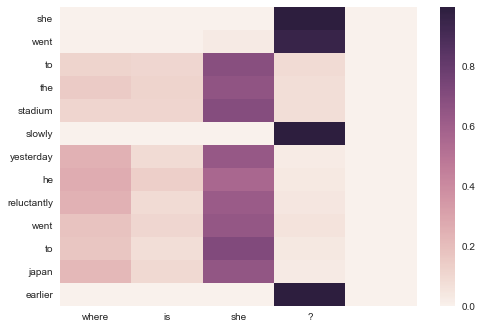

In [11]:
for i in classify:
    sns.heatmap(prob[i][:len(tokenize(test.text[i]))], yticklabels = tokenize(test.text[i]), xticklabels = tokenize(test.q_text[i]))
    plt.show()

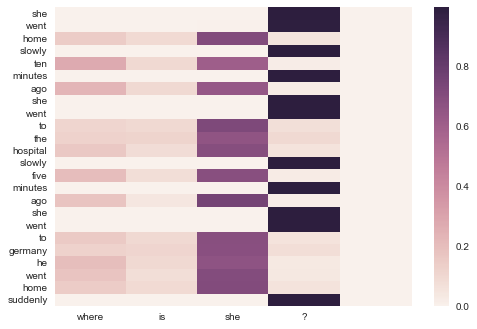

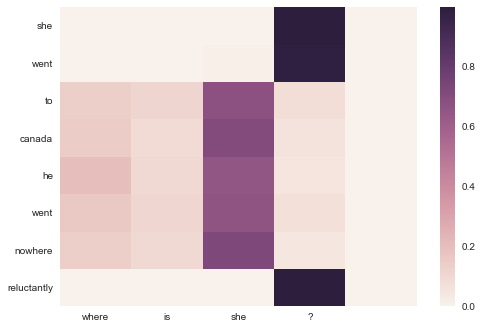

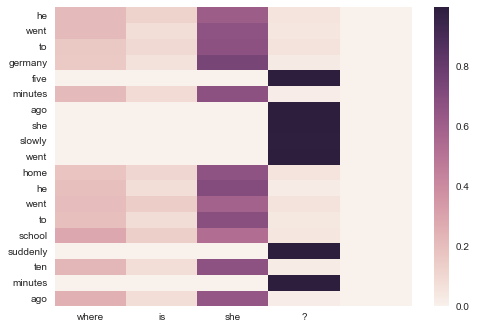

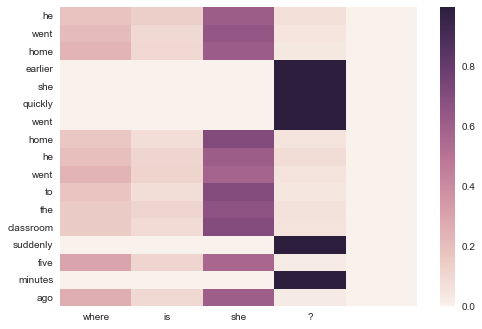

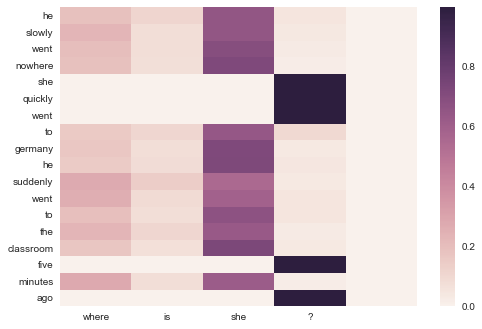

In [12]:
for i in mis_classify:
    sns.heatmap(prob[i][:len(tokenize(test.text[i]))], yticklabels = tokenize(test.text[i]), xticklabels = tokenize(test.q_text[i]))
    plt.show()

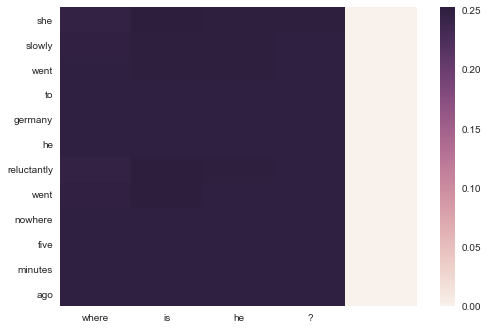

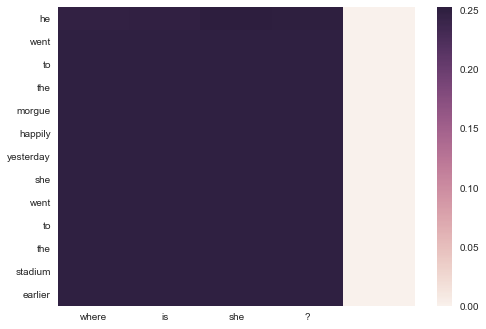

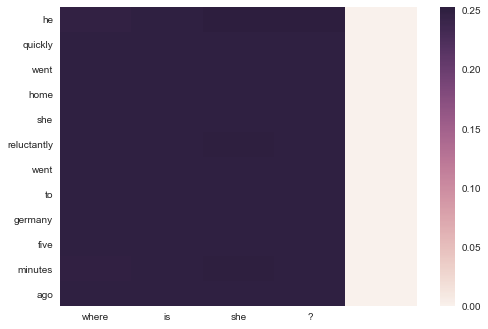

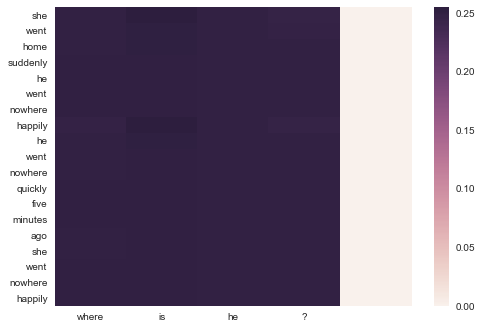

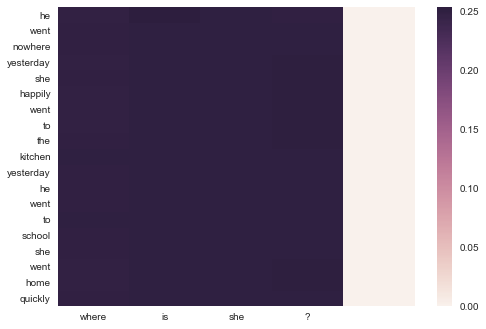

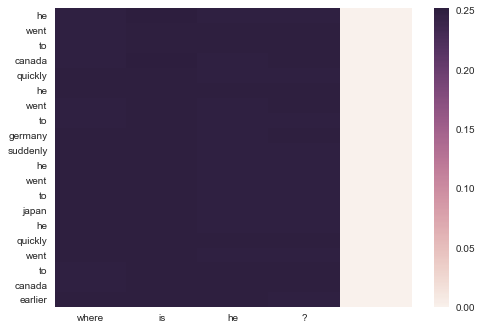

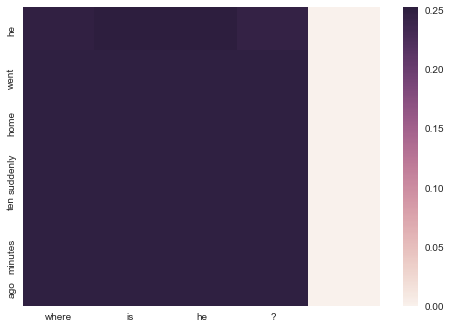

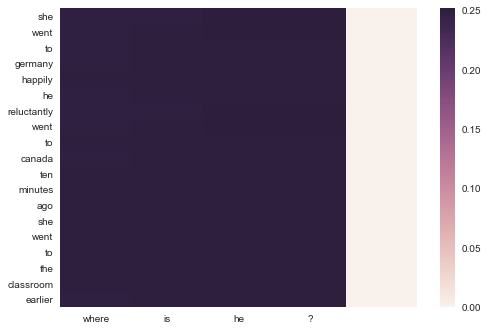

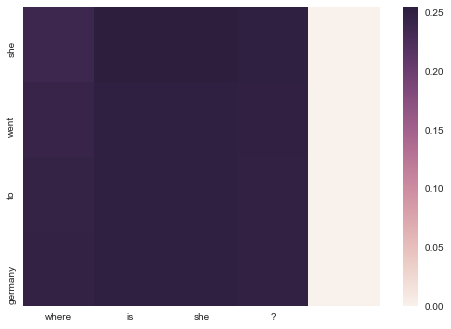

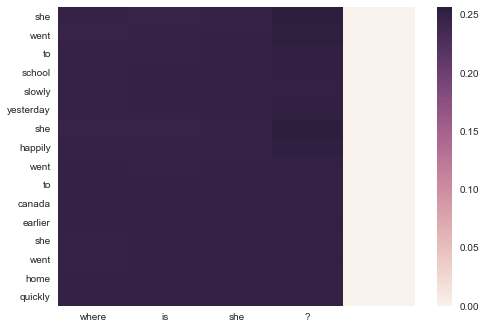

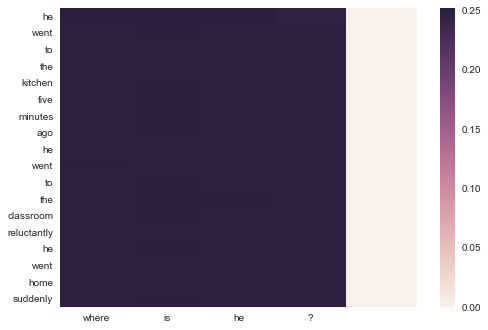

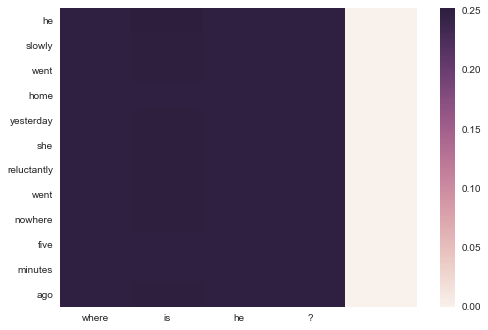

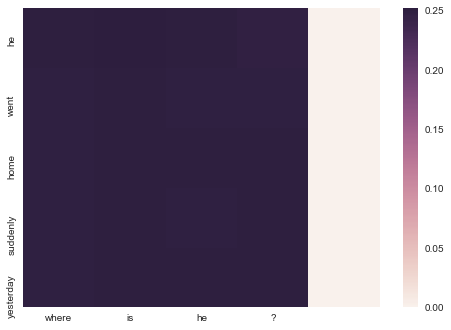

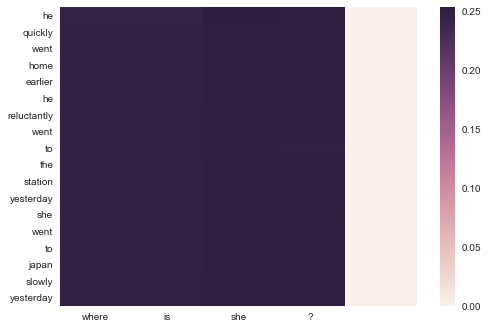

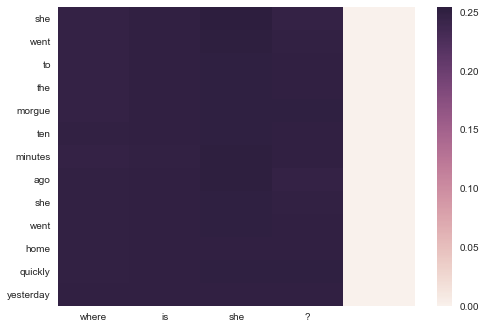

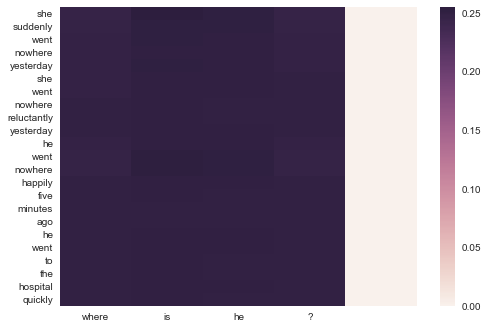

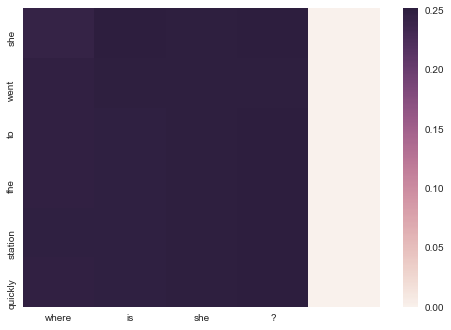

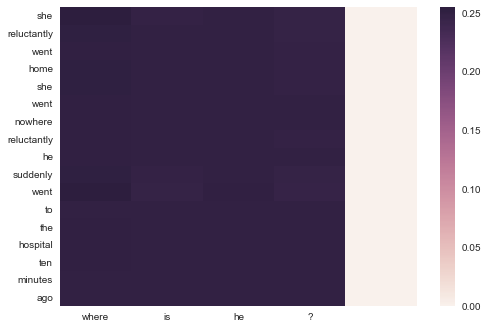

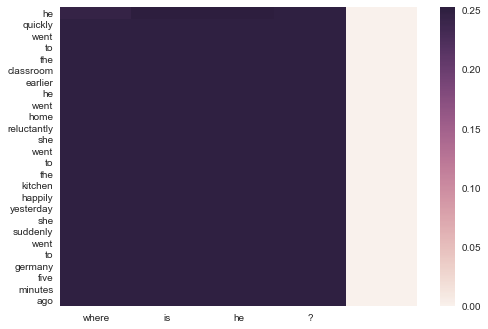

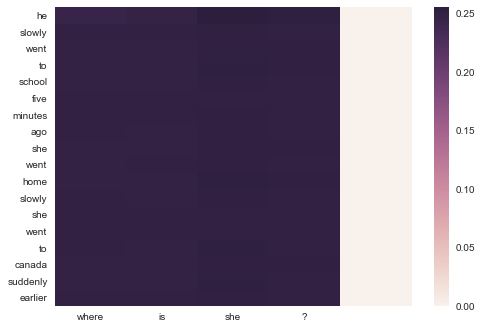

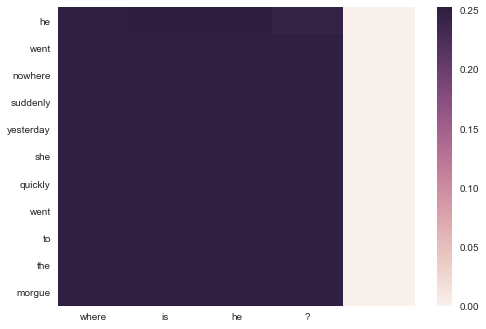

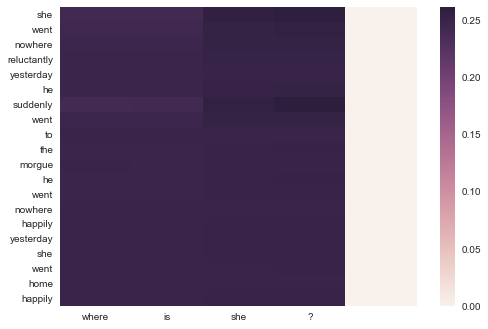

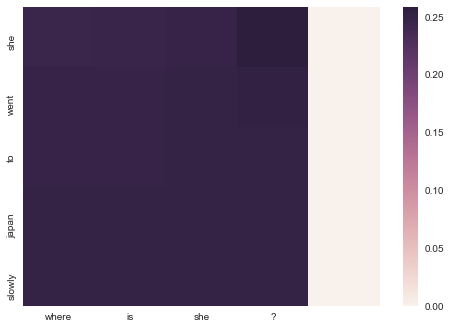

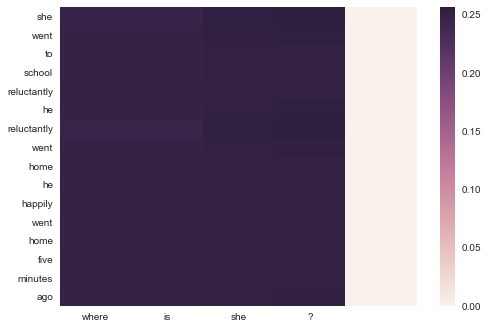

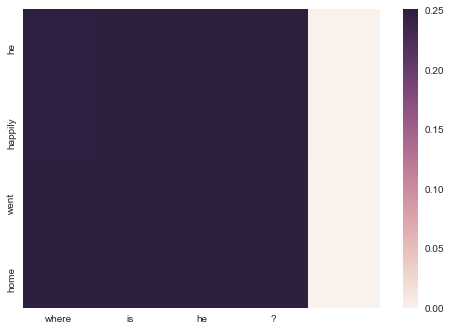

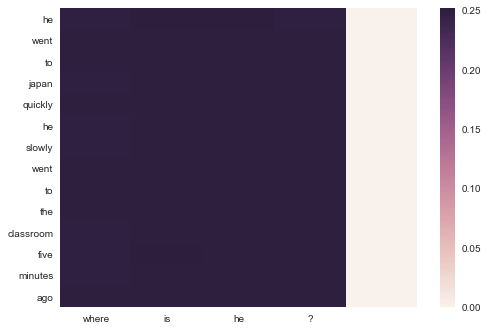

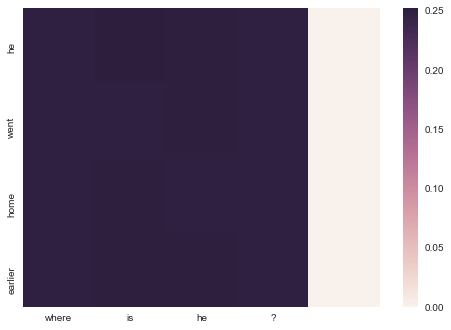

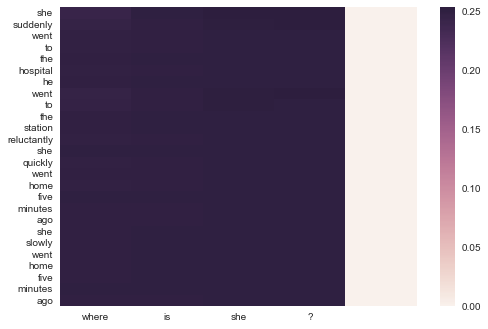

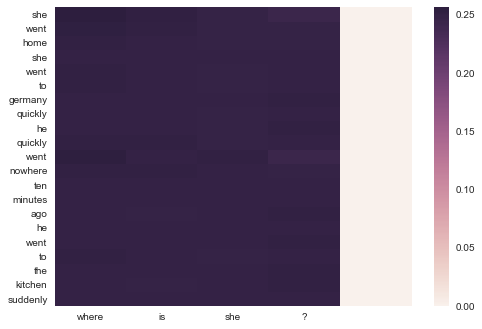

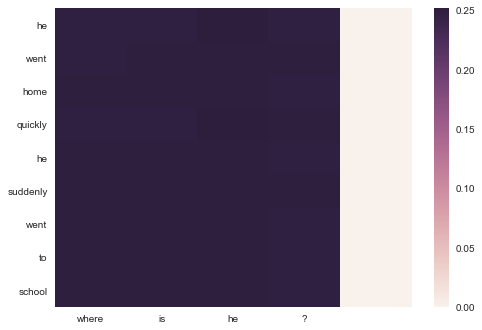

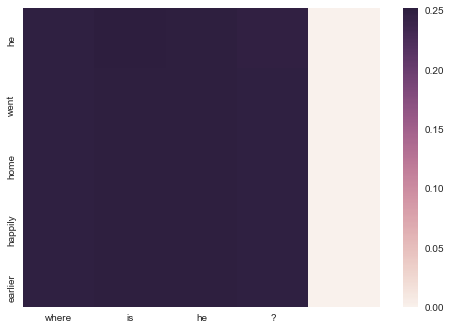

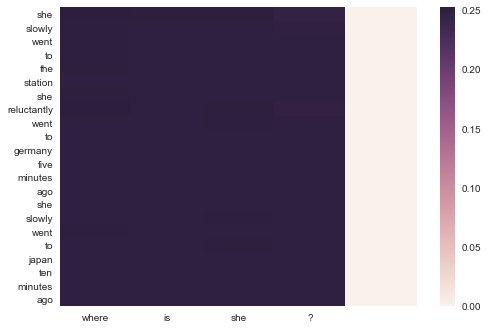

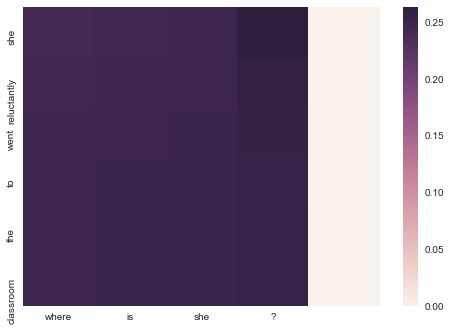

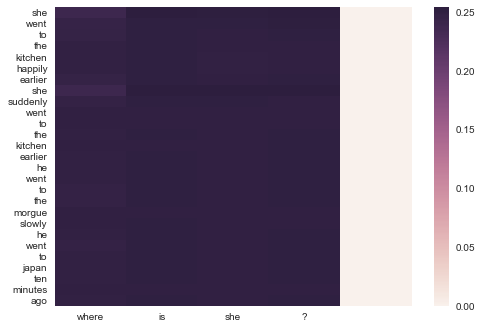

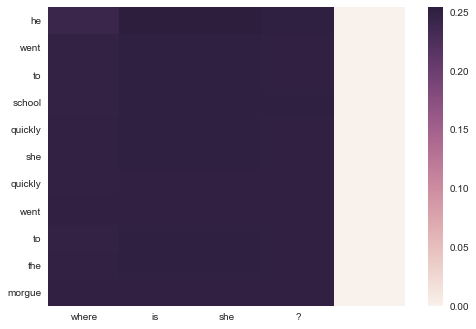

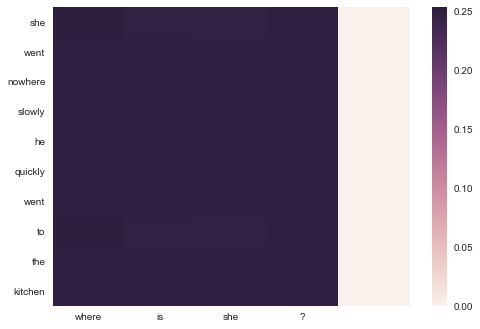

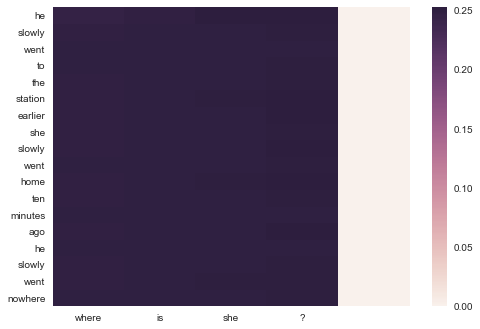

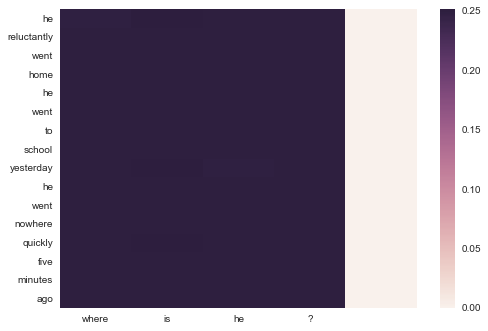

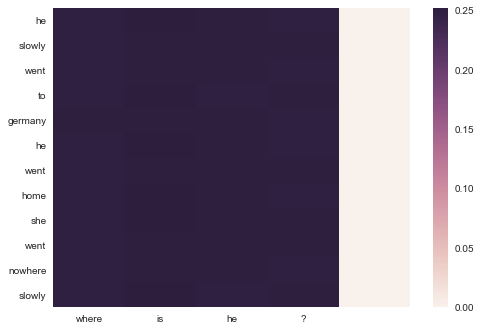

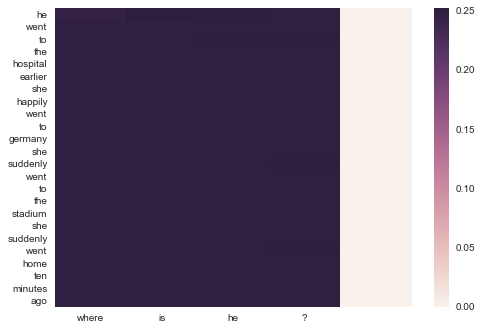

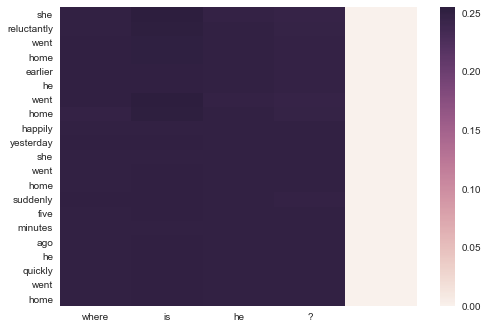

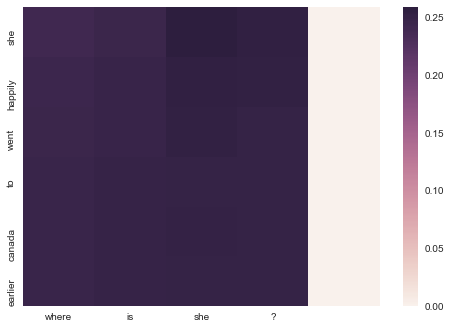

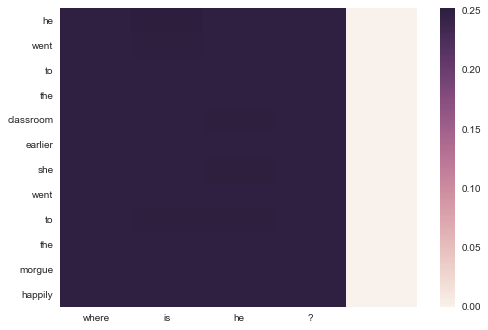

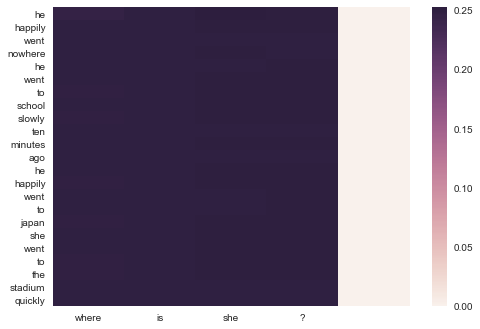

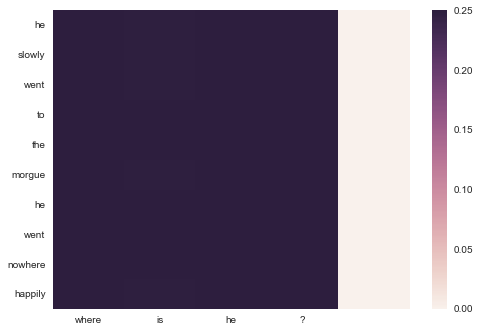

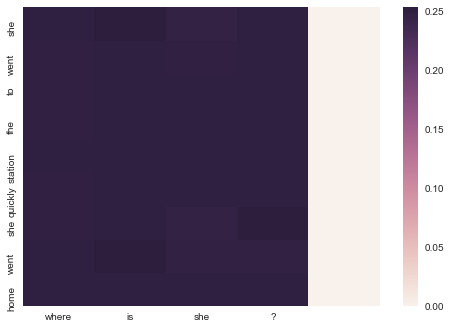

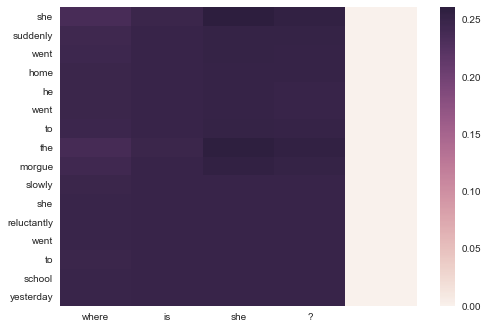

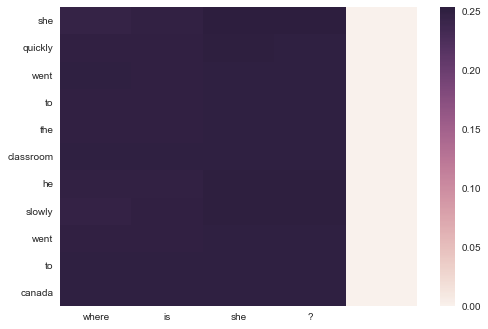

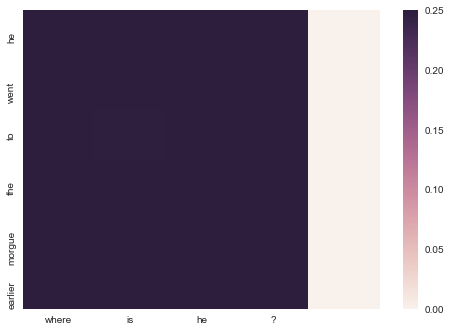

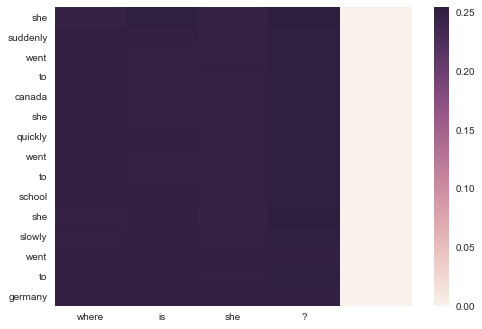

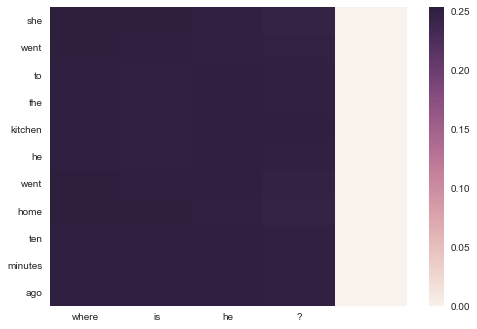

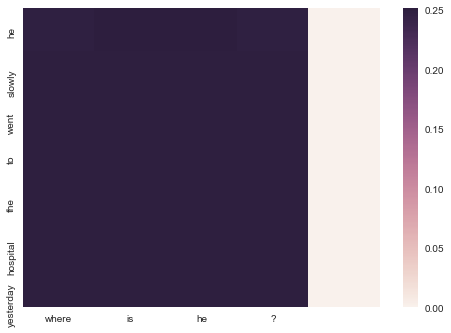

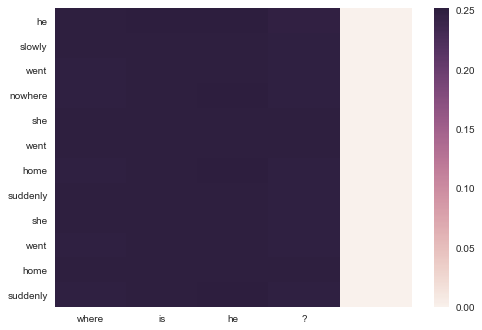

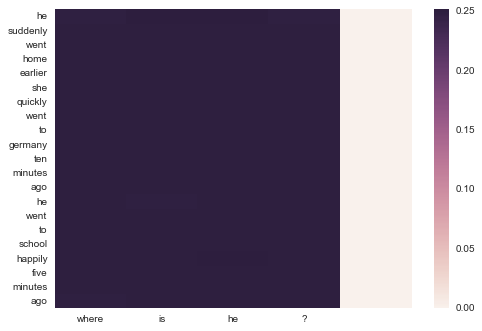

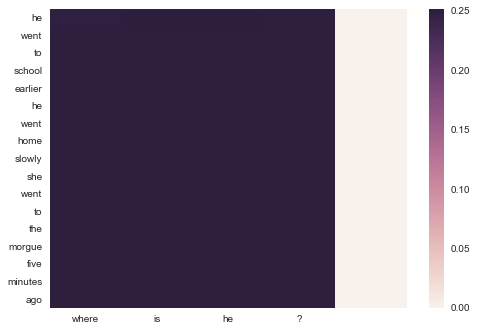

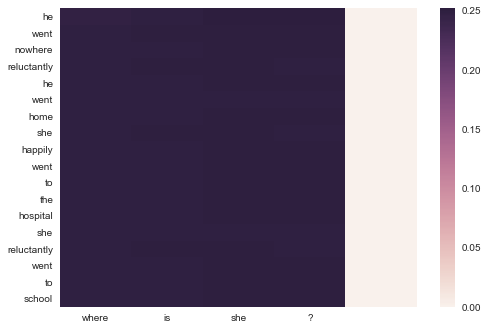

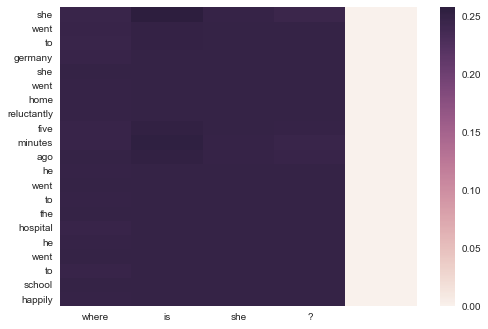

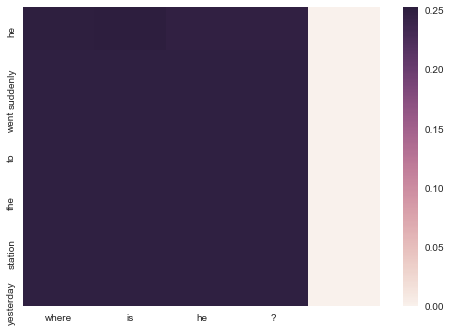

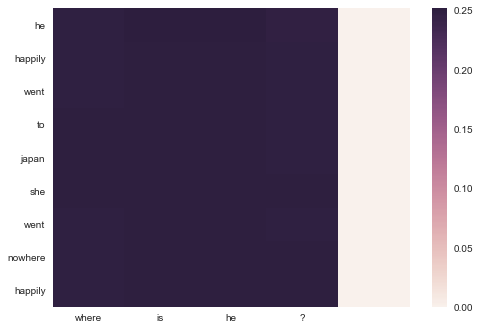

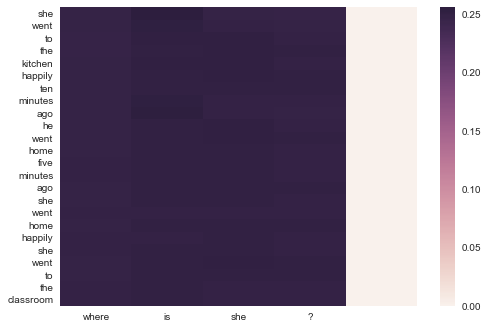

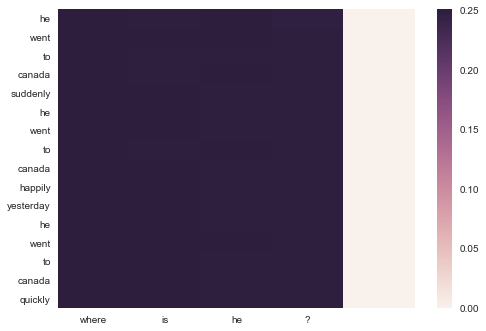

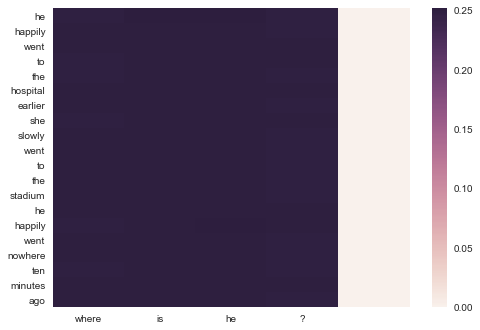

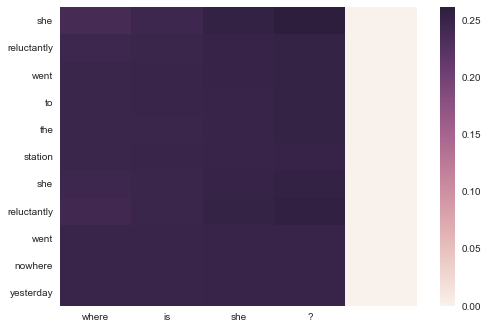

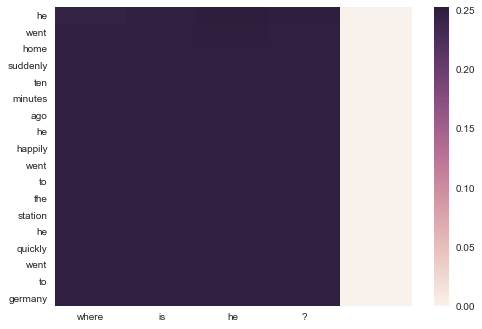

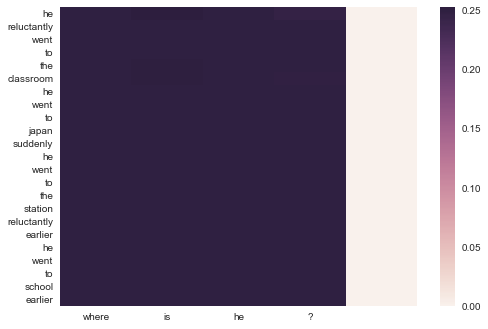

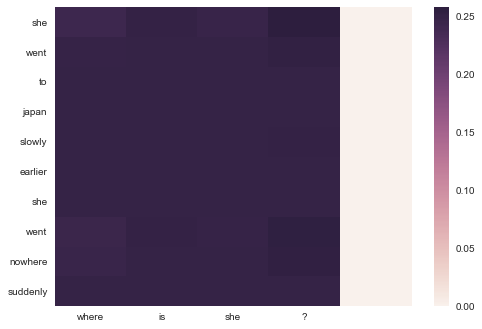

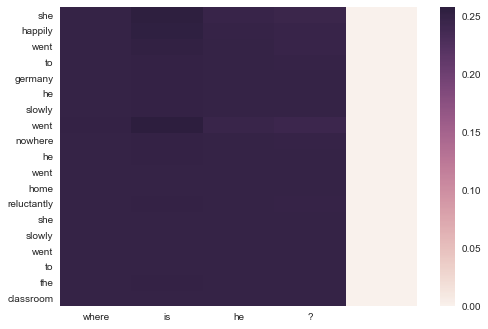

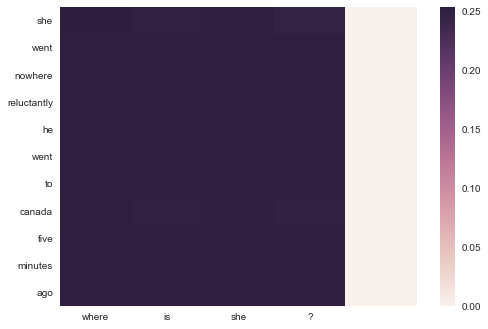

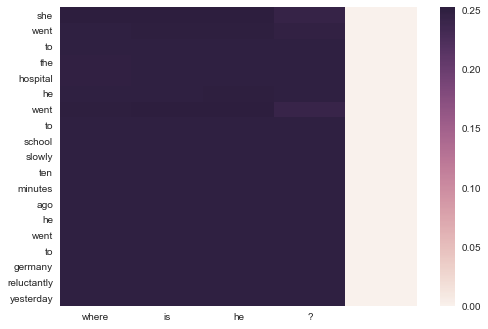

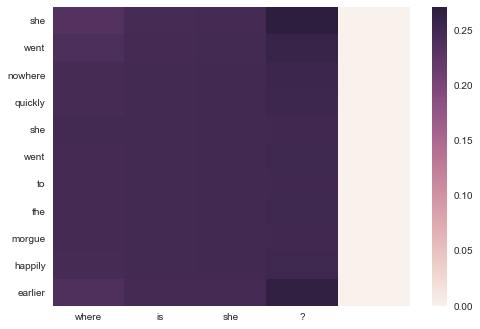

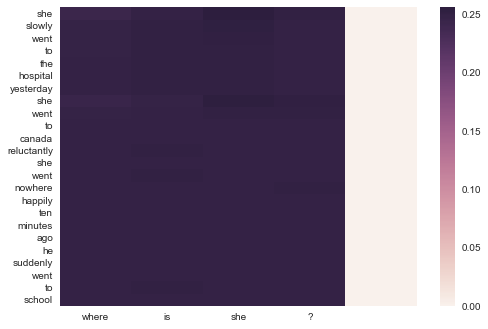

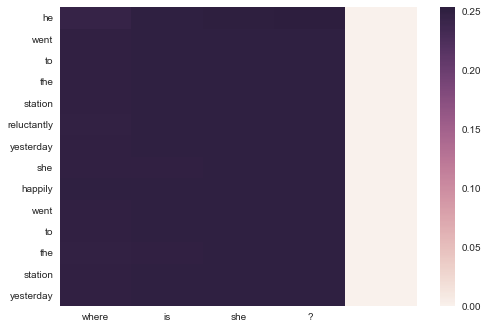

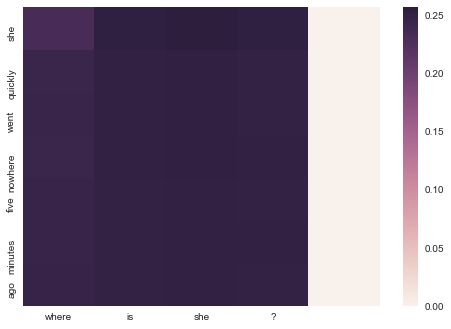

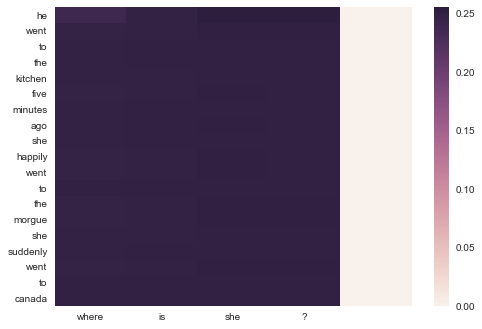

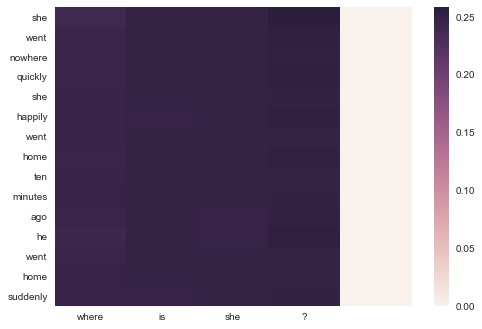

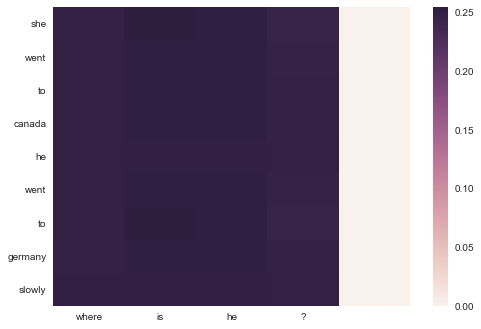

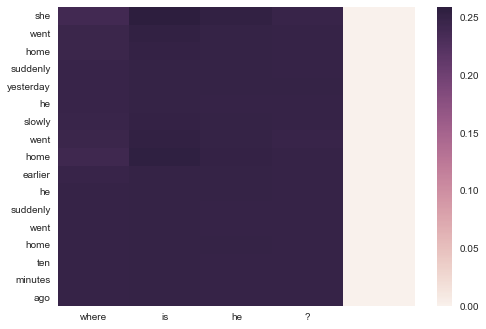

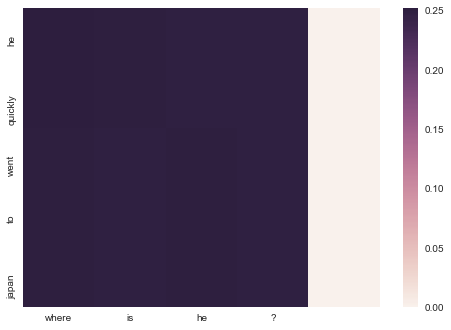

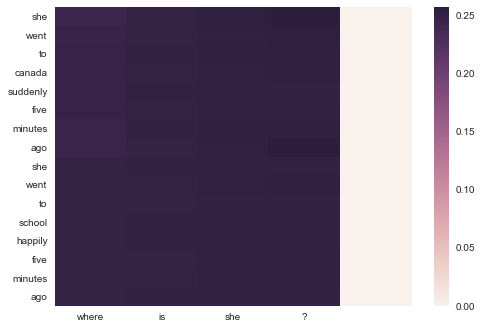

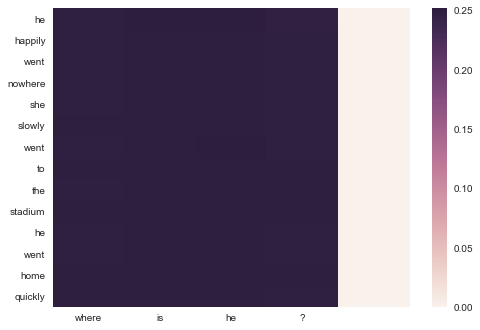

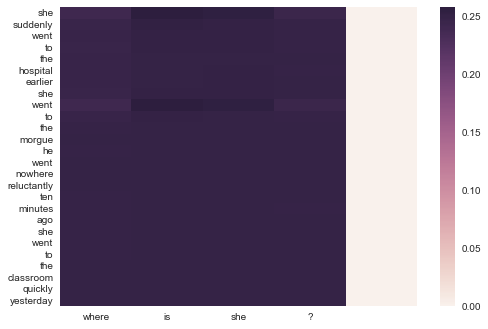

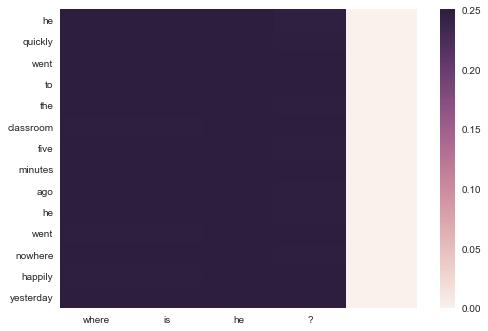

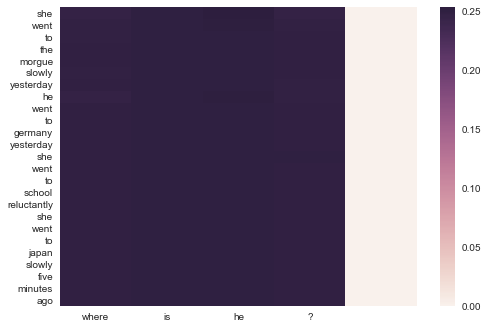

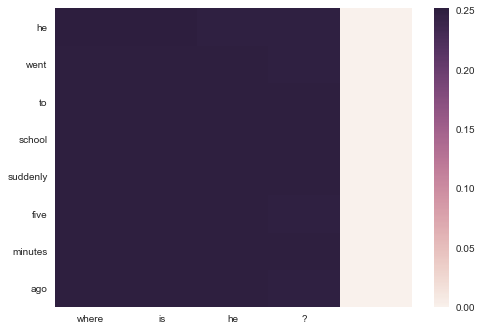

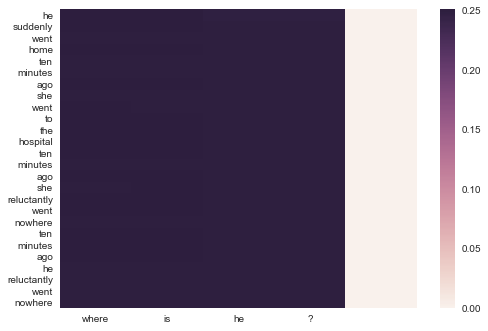

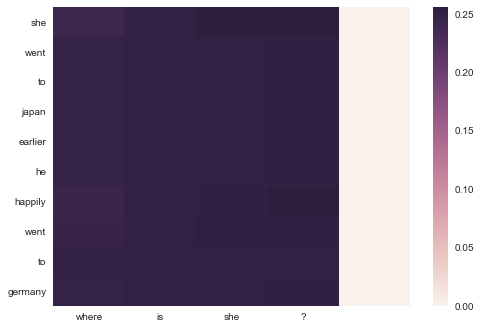

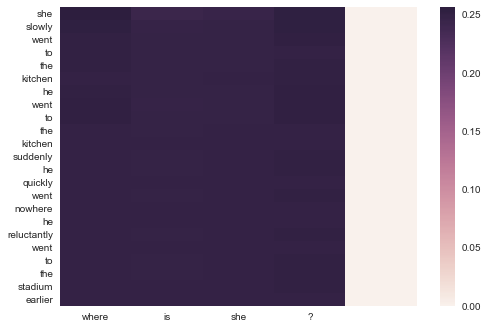

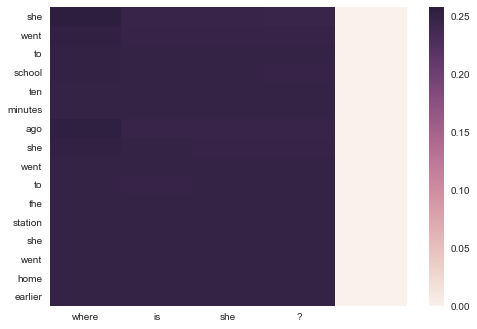

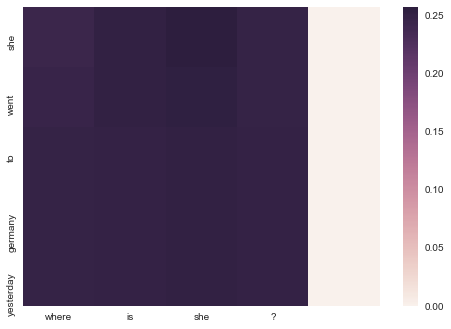

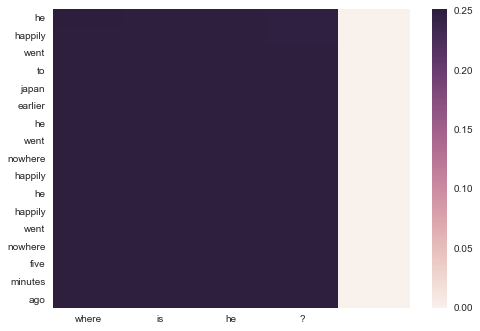

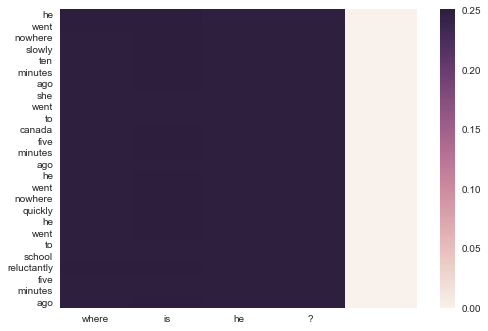

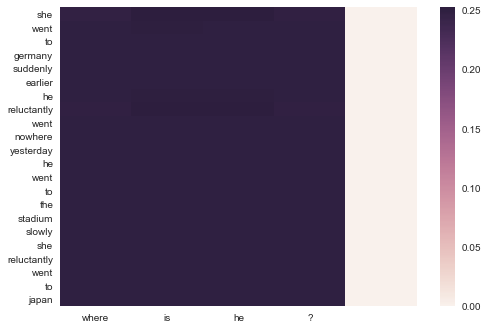

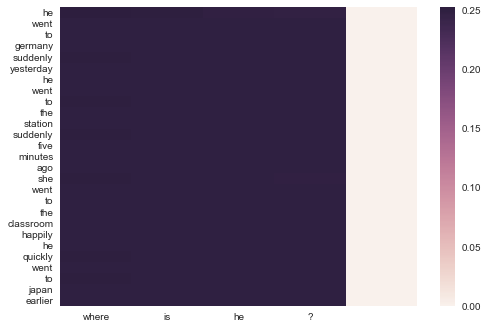

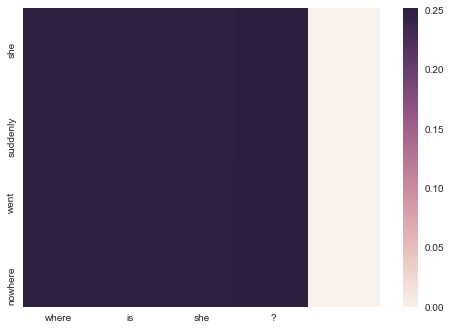

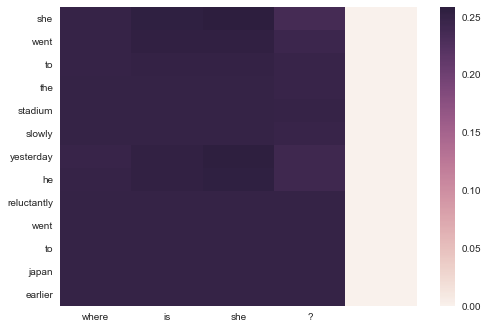

In [14]:
for i in classify:
    sns.heatmap(hprob[i][:len(tokenize(test.text[i]))], yticklabels = tokenize(test.text[i]), xticklabels = tokenize(test.q_text[i]))
    plt.show()

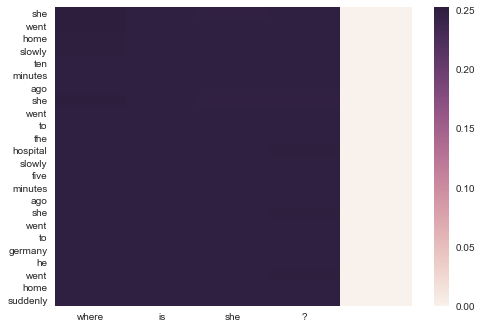

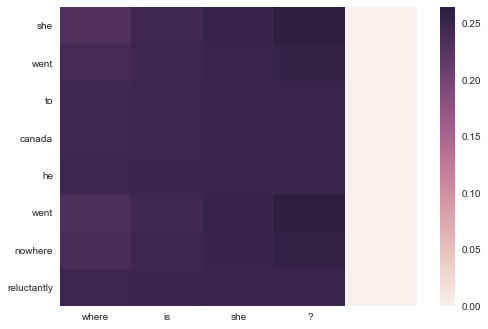

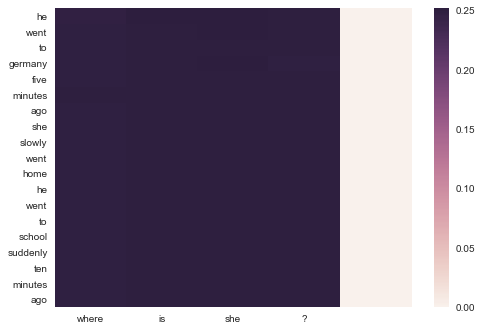

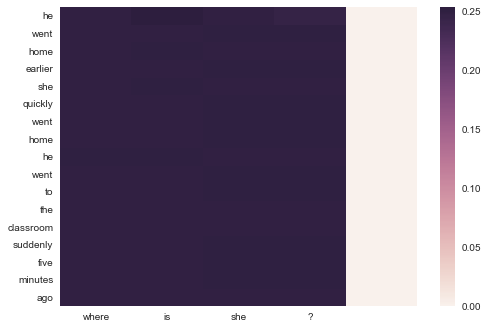

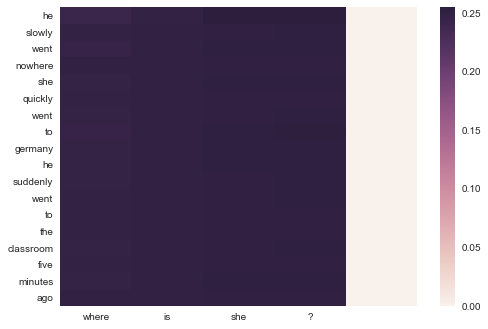

In [15]:
for i in mis_classify:
    sns.heatmap(hprob[i][:len(tokenize(test.text[i]))], yticklabels = tokenize(test.text[i]), xticklabels = tokenize(test.q_text[i]))
    plt.show()